# TODO

- write up the methodology better with proper references and more images etc etc

## The story

-  This is Nic "thunderbolt straman 

In [1]:
%%javascript
Jupyter.notebook.config.update({"load_extensions":{"calico-spell-check":true,
                                                  "calico-document-tools":true,
                                                  "calico-cell-tools":true}})

<IPython.core.display.Javascript object>

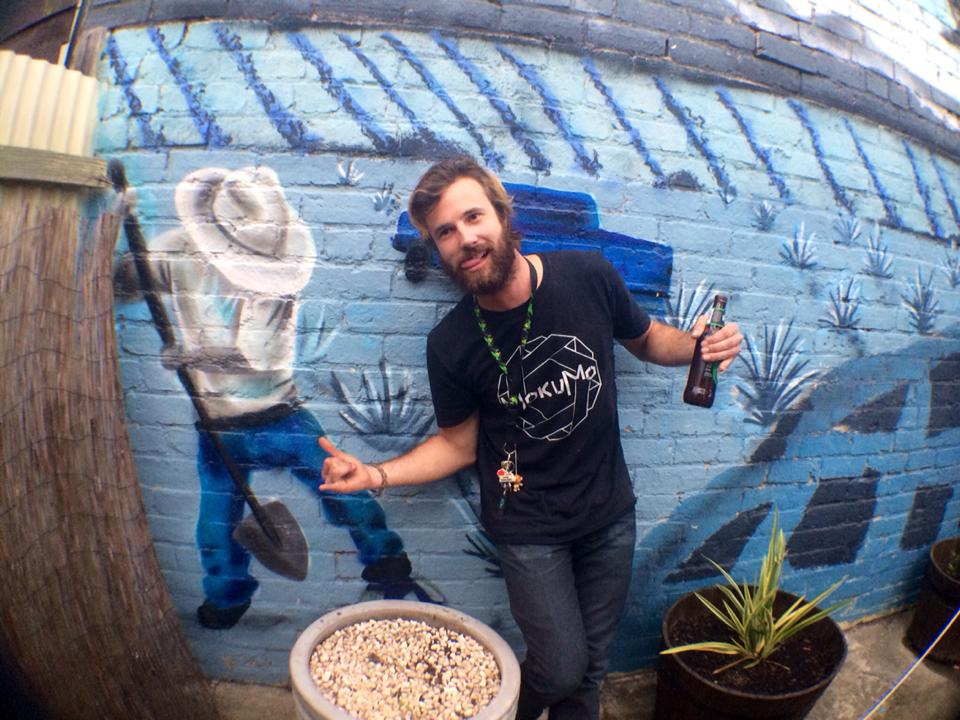

In [2]:
from IPython.display import Image
Image("pics/known_pics/nic1.jpg")

He is a lovely guy, and not let his real rags ot ritches story get to his head, a man with a _nice vibe_ to him. Unfortiuntly I have issues remembering his face, it happens again and again and again.

- Nic has issued me the ultimate challenge: that of idenidifying him in a previous life. Instead of acceptinng my deafeat, i thought i could use this as example to test the powers of pre trained AI alogrithms and to dip my toes into deep learning.

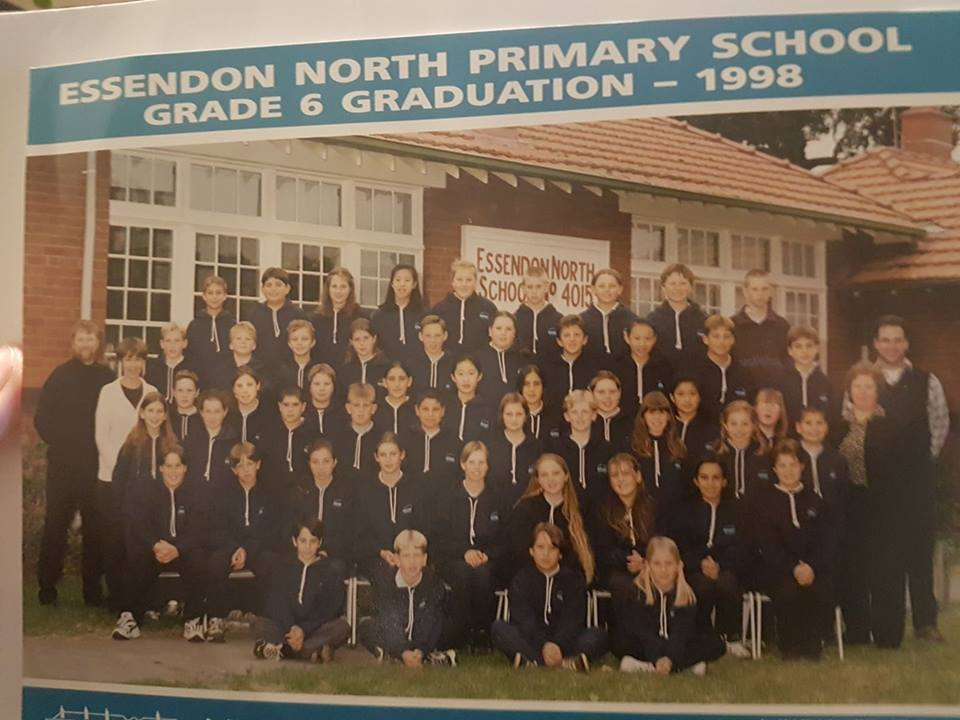

In [3]:
Image('pics/unknown_pics/20264668_10155619675338708_5837050785050262894_n.jpg')

#### For the love of god I hope i get this correct

## The Method

- My initial search lead me to a librarby which provides a facial recognition https://github.com/ageitgey/face_recognition which seems very useful for simple use and is something i would love to hack with my raspberry pi, but it's simlicity let to it both being too difficult to change to my needs and left me feeling i wan't learning anything low level enough

- Looking into it, the face_recognition library was built upon the c++ library dlib https://github.com/davisking/dlib and athe python API



In [11]:
# First we must import a hell of a lot of libraries (this is python after all) and set up our paths

import sys
import os
import dlib
import glob
from skimage import io
import numpy as np
from numpy.linalg import norm
from scipy import spatial
# set up paths
# faces_folder_path =  '../examples/nic'
faces_folder_path =  'pics/unknown_pics/nic'
ref_photo_path='pics/known_pics/nic1.jpg'

In [12]:
# We now need to load in multiple models and means of interpreting these models

# The Face detector
detector = dlib.get_frontal_face_detector()
# The framework for transfering this into a "shape"
sp = dlib.shape_predictor('models/shape_predictor_68_face_landmarks.dat')
# the algoritm which can "recognise the faces
facerec = dlib.face_recognition_model_v1('models/dlib_face_recognition_resnet_model_v1.dat')
#intialises the window for use to view the image (you will have to pull the code to do this live)
win = dlib.image_window()

### We now analyse nics face so we we a vecotr of 128 values (think of it like contours on a map) that corrospond to the values in nics face

In [13]:
img=io.imread(ref_photo_path)
# detect face
dets = detector(img, 1)
for face in dets:
    shape = sp(img, face)
    # get the numerical vlaues
    face_descriptor = facerec.compute_face_descriptor(img, shape,100)
    face_val_nic=np.array(face_descriptor)

### Now we have everything set up we iterate through every face 

In [14]:
# Now process all the faces against nic
for f in glob.glob(os.path.join('../examples/nic', "*.jpg")):
    print("Processing file: {}".format(f))
    img = io.imread(f)
    win.clear_overlay()
    win.set_image(img)
    # Ask the detector to find the bounding boxes of each face. The 1 in the
    # second argument indicates that we should upsample the image 1 time. This
    # will make everything bigger and allow us to detect more faces.
    
    # We find the faces in the images and let the computer know the boundrites on the faces
    # so we know where to analyse
    dets = detector(img, 1)
    print("Number of faces detected: {}".format(len(dets)))

Now that we have the face boxes set up, we then iterate thoguh all possible faces, taking the 128 long vecotr of values, and then take the cosine similarity, each face is upsampled ~~ 30 times: reanalysing the photo with slight variations to improve the robustness of our prediction.

Whilst this doesn't pick the top three, it runs like a WWE wrestling title belt, where the winner is nic, untill they are beaten

In [15]:
best_simil=0
for num,face in enumerate(dets):
#     print(num,face)
    #get shape
    shape = sp(img, face)
#     print(shape)
    # get the numerican vlaues
    face_descriptor = facerec.compute_face_descriptor(img, shape,30)
    face_val=np.array(face_descriptor)
    simil=1-spatial.distance.cosine(face_val_nic, face_val)
    if simil>best_simil:
        print('NEW RECORD')
        best_simil=simil
        print('The new NIC is person {} located at {} with a similarity of {}'.format(num,face,simil))
        good_face=face
        shape = sp(img, good_face)
        win.clear_overlay()
        win.add_overlay(good_face)
        win.add_overlay(shape)

NEW RECORD
The new NIC is person 0 located at [(424, 196) (514, 285)] with a similarity of 0.99989450036055


In [ ]:
shape = sp(img, good_face)
# Draw the face landmarks on the screen so we can see what face is currently being processed.
win.clear_overlay()
win.add_overlay(good_face)
win.add_overlay(shape)

### Areas of future research / Improvement

- Trying differnt facial recognition modles/libraries

- Comparing against other/multiple images to get an average similarity

- Actualy recognising Nic when i see him next